In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
with pd.HDFStore("data/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")
df.shape

(1710756, 111)

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [3]:
print('%d financial instruments' % len(df['id'].unique()))

1424 financial instruments


In [4]:
print('%d timestamps' % len(df['timestamp'].unique()))

1813 timestamps


In [3]:
missing_ratio = df.isnull()/df.shape[0]

MemoryError: 

In [ ]:
pd.DataFrame(missing_ratio).plot(kind = 'bar',xticks =[],rot = 130,figsize = (12,4),fontsize = 6,title = 'Missing ratio per col')

### stats exploration

In [4]:
columns_to_see = df.columns[2:]
dict_stats = dict()
dict_stats['mean'] = list(map(lambda x: df[x].mean(),columns_to_see))
dict_stats['std'] = list(map(lambda x: df[x].std(),columns_to_see))
dict_stats['max'] = list(map(lambda x: df[x].max(),columns_to_see))
dict_stats['min'] = list(map(lambda x: df[x].min(),columns_to_see))
stats_pd = pd.DataFrame.from_dict(dict_stats).set_index(columns_to_see)

In [6]:
derived_cnt=0
fundamental_cnt=0
technical_cnt=0

for i in stats_pd.index:
    if 'derived' in i:
        derived_cnt +=1
    if 'fundamental' in i:
        fundamental_cnt +=1
    if 'technical' in i:
        technical_cnt +=1
print('derived_cnt:%d'%derived_cnt)
print('fundamental_cnt:%d'%fundamental_cnt)
print('technical_cnt:%d'%technical_cnt)

derived_cnt:5
fundamental_cnt:63
technical_cnt:40


In [7]:
print('%d columns have standard deviation fewer than 1\n' % sum(stats_pd['std']<1))
print('They are %s'%(list(stats_pd[stats_pd['std']<1].index)))

56 columns have standard deviation fewer than 1

They are ['fundamental_0', 'fundamental_3', 'fundamental_8', 'fundamental_21', 'fundamental_24', 'fundamental_28', 'fundamental_38', 'fundamental_40', 'fundamental_43', 'fundamental_47', 'fundamental_54', 'fundamental_58', 'fundamental_59', 'fundamental_60', 'fundamental_62', 'fundamental_63', 'technical_0', 'technical_1', 'technical_2', 'technical_3', 'technical_5', 'technical_6', 'technical_7', 'technical_9', 'technical_10', 'technical_11', 'technical_12', 'technical_13', 'technical_14', 'technical_16', 'technical_17', 'technical_18', 'technical_19', 'technical_20', 'technical_22', 'technical_24', 'technical_25', 'technical_27', 'technical_28', 'technical_29', 'technical_30', 'technical_31', 'technical_32', 'technical_33', 'technical_34', 'technical_35', 'technical_36', 'technical_37', 'technical_38', 'technical_39', 'technical_40', 'technical_41', 'technical_42', 'technical_43', 'technical_44', 'y']


In [9]:
derived_cnt_nor=0
fundamental_cnt_nor=0
technical_cnt_nor=0

for i in stats_pd[stats_pd['std']<1].index:
    if 'derived' in i:
        derived_cnt_nor +=1
    if 'fundamental' in i:
        fundamental_cnt_nor +=1
    if 'technical' in i:
        technical_cnt_nor +=1
print('%d out of %d normalized-able(std<1) in derived'%(derived_cnt_nor,derived_cnt))
print('%d out of %d normalized-able in fundamental'%(fundamental_cnt_nor,fundamental_cnt))
print('%d out of %d normalized-able in technical'%(technical_cnt_nor,technical_cnt))

0 out of 5 normalized-able(std<1) in derived
16 out of 63 normalized-able in fundamental
39 out of 40 normalized-able in technical


** check the only one un-normalized-able column in technical column:**

In [37]:
for i in stats_pd.index:
    if 'technical' in i:
        if i not in stats_pd[stats_pd['std']<1].index:
            print('Only %s under technical category cannot be normalized commonly'%i)
            print('--------------')
            print(stats_pd.ix[i])
            print('--------------')
            print('%d records involved %d instruments have std over 10' %(len(df[df[i]>10]),len(df[df[i]>10]['id'].unique())))
            print('They are %s\n' % df[df[i]>10]['id'].unique())
            print('%d records involved %d instruments have std over 100' %(len(df[df[i]>100]),len(df[df[i]>100]['id'].unique())))
            print('They are %s' % df[df[i]>100]['id'].unique())

Only technical_21 under technical category cannot be normalized commonly
--------------
max     1029.848389
mean      -0.012947
min       -6.085453
std        2.251926
Name: technical_21, dtype: float64
--------------
73 records involved 9 instruments have std over 10
They are [1564 1038  703 1686 1394  846 2140  317 1139]

14 records involved 1 instruments have std over 100
They are [1139]


In [ ]:
instru_list = [1564,1038,703,1686,1394,846,2140,317,1139]
i = 0
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
for axrows in axes:
    for ax in axrows:
        instru = instru_list[i]
        sns.pointplot(data = df[df['id']==instru],x = 'timestamp',y = 'technical_21',ax=ax)
        i += 1
plt.tight_layout()

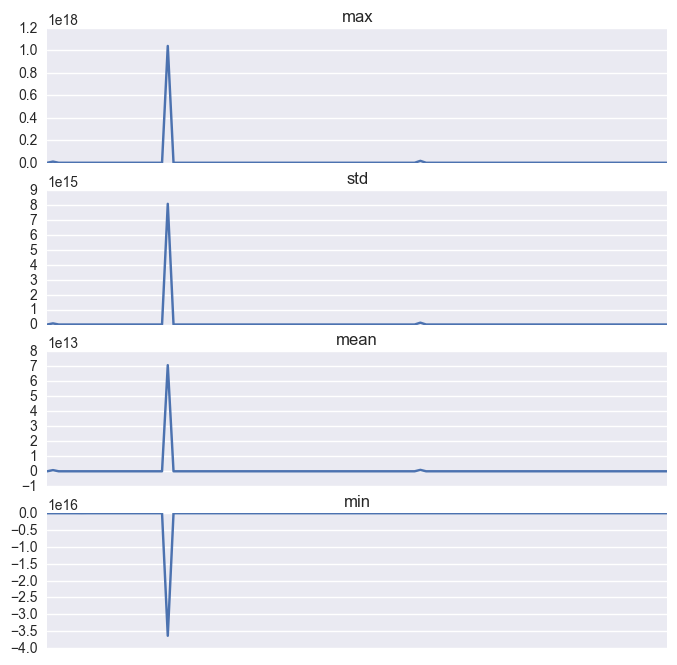

In [60]:
fig, axes = plt.subplots(4, 1, figsize=(8, 8))
for key,i in zip(dict_stats.keys(),range(0,4)):
    stats_pd[key].plot(title = key,xticks = [],ax=axes[i])

In [154]:
print('%d columns max value fewer than 1'%len(stats_pd[stats_pd['max']<=1]))
stats_pd[stats_pd['max']<=1].sort('max')

35 columns max value fewer than 1


C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,max,mean,min,std
technical_10,0.000000,-0.783597,-2.000000,0.975298
technical_18,0.000000,-0.031902,-1.000000,0.151750
technical_17,0.000000,-0.899243,-2.000000,0.849643
technical_32,0.000000,-0.086691,-1.000000,0.242404
technical_14,0.000000,-0.990658,-2.000000,0.980375
technical_12,0.000000,-0.179737,-1.000000,0.328552
technical_11,0.000000,-0.921707,-2.000000,0.887792
technical_9,0.000000,-0.023041,-1.000000,0.131231
technical_29,0.000000,-0.909805,-2.000000,0.991407
technical_37,0.000000,-0.091034,-1.000000,0.247104


In [170]:
print('%d columns std value larger than 1'% len(stats_pd[stats_pd['std']>1]))
stats_pd[stats_pd['std']>1].sort('std')

53 columns std value larger than 1


C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,max,mean,min,std
fundamental_37,6.840546e+01,1.483696e-01,-3.245080e-01,1.188876e+00
fundamental_30,3.586435e+01,6.634763e-02,-6.891109e+01,1.316970e+00
fundamental_22,2.690963e+02,6.140608e-02,-3.518032e-01,1.750241e+00
fundamental_55,3.828660e+02,-8.485153e-02,-2.224418e+02,1.771217e+00
fundamental_6,1.214948e+02,1.404761e-01,-1.070270e+00,1.786976e+00
technical_21,1.029848e+03,-1.294733e-02,-6.085453e+00,2.251926e+00
fundamental_15,2.542647e+02,2.118761e-01,-1.865915e-01,2.274582e+00
fundamental_57,2.306051e+02,2.221422e-01,-2.826288e-01,2.825126e+00
fundamental_56,1.639057e+02,4.631519e-02,-5.049634e+01,2.963386e+00
fundamental_25,3.665417e+02,1.693920e-01,-3.127510e-01,3.007013e+00


In [226]:
df['technical_21'].values

array([-0.14245284, -0.30935648,  0.1228407 , ...,  0.64903581,
        0.20191512,  4.13163471], dtype=float32)

C:\Users\mnan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


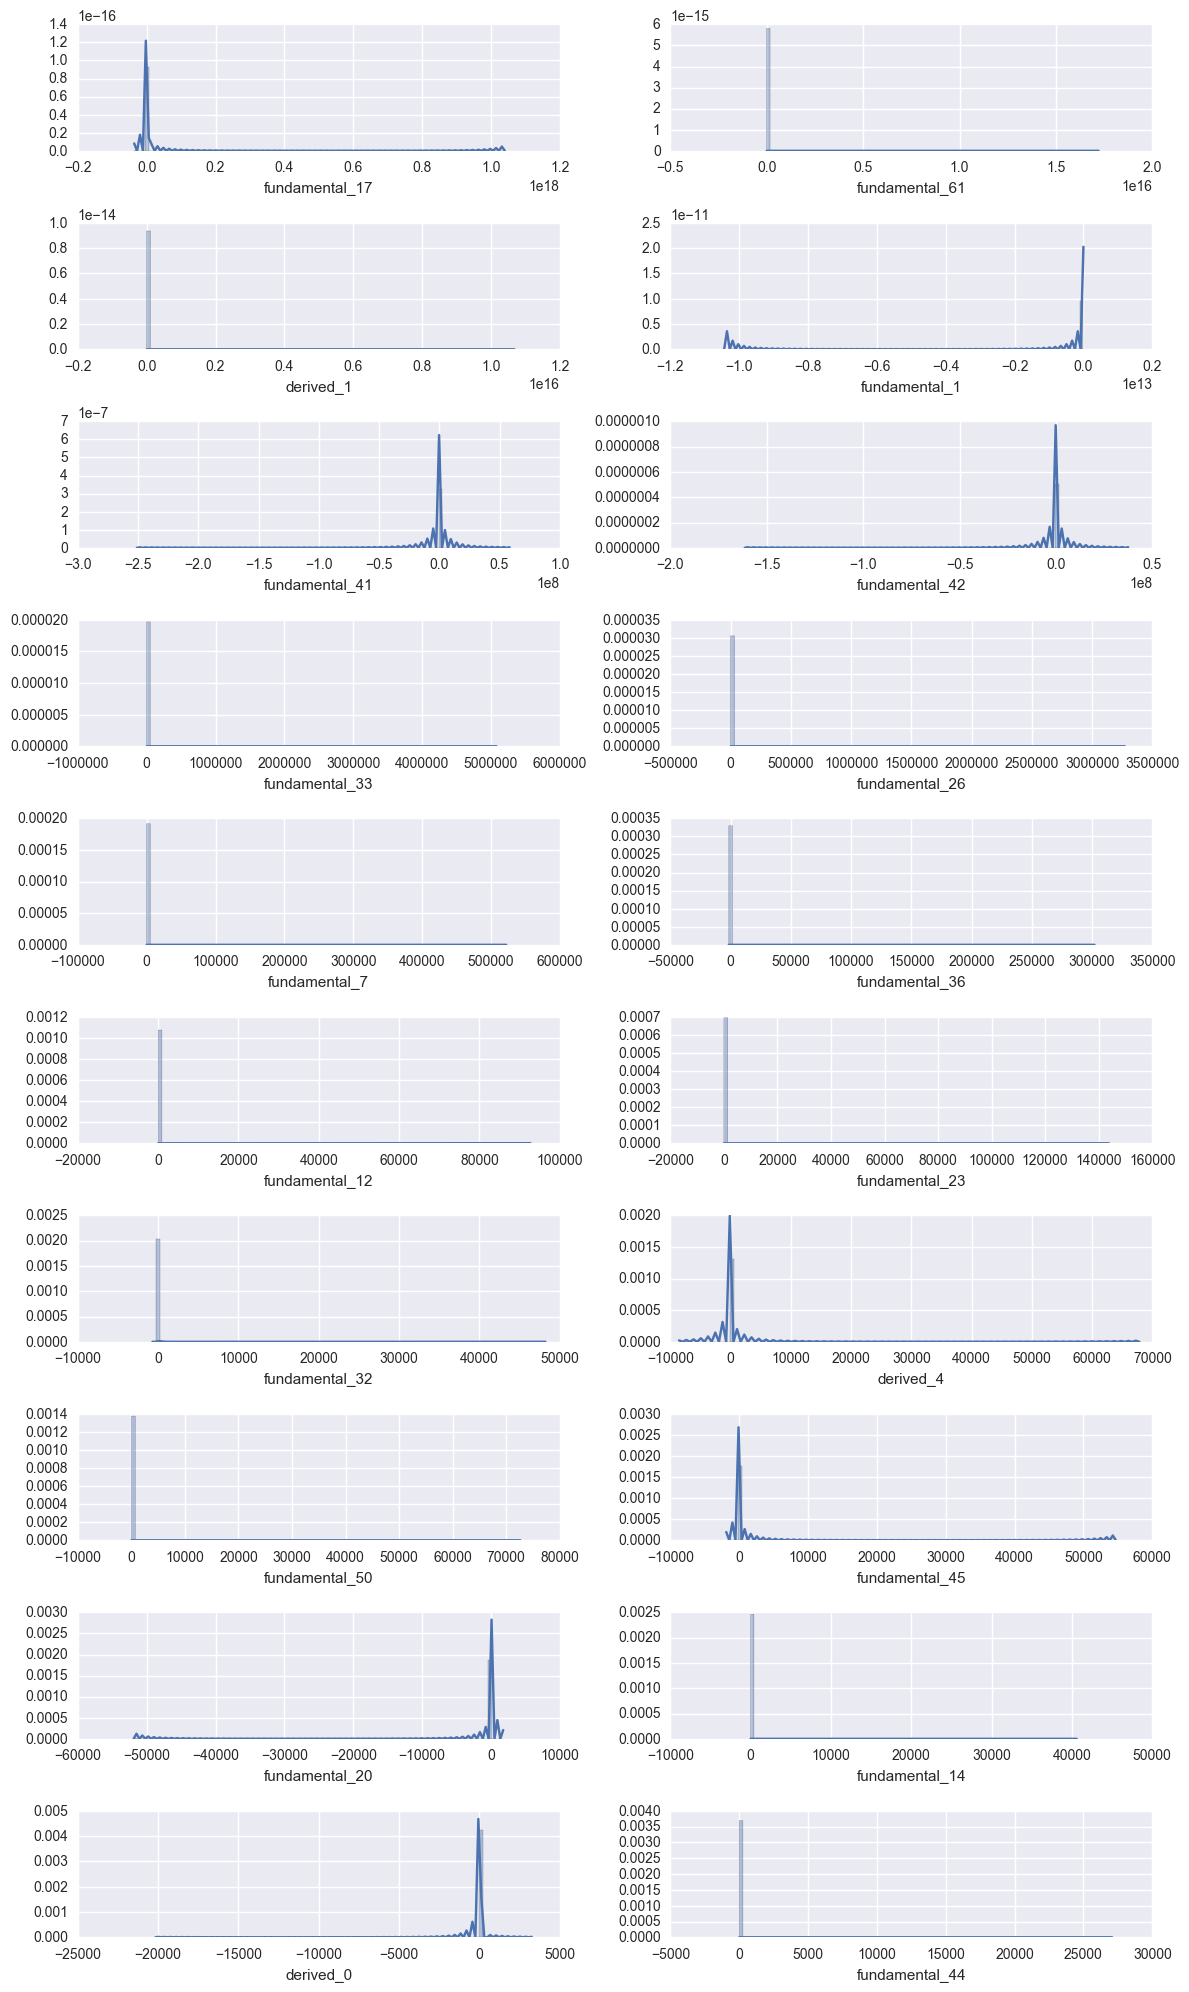

In [292]:
import seaborn as sns
top_std = stats_pd.sort_values(by = 'std',ascending=False).index[:20]
i = 0
n_rows = 10
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))
for axrows in axes:
    for ax in axrows:
        sns.distplot(df[top_std[i]].dropna(),bins = 100,ax=ax)
        i += 1
plt.tight_layout()

In [8]:
print('%d out of %d normalized-able(std<1) in derived'%(derived_cnt_nor,derived_cnt))
print('%d out of %d normalized-able in fundamental'%(fundamental_cnt_nor,fundamental_cnt))
print('%d out of %d normalized-able in technical'%(technical_cnt_nor,technical_cnt))

NameError: name 'derived_cnt_nor' is not defined

In [301]:
normalized_able_col = stats_pd[stats_pd['std']<=1].index

In [164]:
stats_pd.sort('max')[35:]

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,max,mean,min,std
technical_7,1.217279e+00,5.059733e-02,-4.050815e-01,3.412927e-01
technical_33,1.322735e+00,1.754952e-02,-5.471164e-01,1.875426e-01
fundamental_0,1.378195e+00,-2.040938e-02,-2.344957e+00,2.494859e-01
technical_40,1.569265e+00,4.908321e-02,-5.250904e-01,3.102316e-01
fundamental_59,1.918350e+00,1.480153e-01,-1.489624e-01,3.628329e-01
fundamental_63,2.588689e+00,1.522306e-01,-3.298322e-01,3.576581e-01
fundamental_58,2.604494e+00,2.167122e-02,-3.751944e-01,3.222283e-01
fundamental_62,2.717353e+00,-5.293713e-02,-2.870304e+00,5.039921e-01
fundamental_54,3.486828e+00,1.882488e-01,-2.777064e-01,4.009745e-01
fundamental_21,3.505455e+00,9.907262e-02,-1.870385e+00,3.223995e-01


In [107]:
for i in range(17,30):
    print('%dth mean:%s' % (i,stats_pd.sort('mean',ascending=False)['mean'].values[i]))
    print('%dth std:%s' % (i,stats_pd.sort('mean',ascending=False)['std'].values[i]))
    print('%dth max:%s' % (i,stats_pd.sort('mean',ascending=False)['max'].values[i]))
    print('%dth min:%s' % (i,stats_pd.sort('mean',ascending=False)['min'].values[i]))
    print('--------------')

17th mean:1.46803975105
17th std:272.894897461
17th max:54711.2578125
17th min:-1878.93432617
--------------
18th mean:0.7752404809
18th std:18.1978187561
18th max:1535.05078125
18th min:-0.139272928238
--------------
19th mean:0.555851340294
19th std:60.5146369934
19th max:10464.6210938
19th min:-3.3879802227
--------------
20th mean:0.441840052605
20th std:4.33014392853
20th max:345.405975342
20th min:-0.0845313444734
--------------
21th mean:0.398928046227
21th std:12.7438430786
21th max:1152.07104492
21th min:-2.28775715828
--------------
22th mean:0.348972350359
22th std:3.5602812767
22th max:269.651367188
22th min:-0.251859784126
--------------
23th mean:0.344097107649
23th std:4.28962993622
23th max:255.748672485
23th min:-0.167001262307
--------------
24th mean:0.343414545059
24th std:3.82114744186
24th max:181.329055786
24th min:-0.0787493139505
--------------
25th mean:0.324942857027
25th std:53.7770652771
25th max:1608.10217285
25th min:-13128.1513672
--------------
26th mea

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


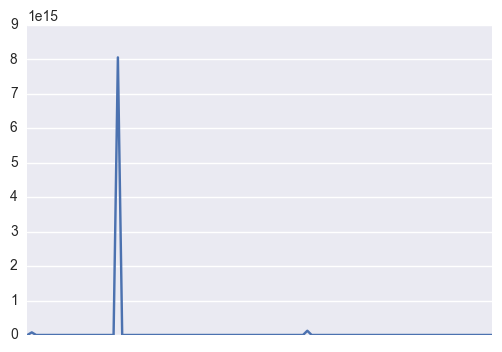

In [44]:
pd.DataFrame.from_dict(dict_stats).set_index(columns_to_see)['std'].plot(xticks = [])

In [63]:
print('col with missing values, ordered by number:')
print(list(pd.DataFrame(missing_ratio).sort(0,ascending=False).index))

col with missing values, ordered by number:
['fundamental_5', 'fundamental_38', 'fundamental_6', 'fundamental_1', 'fundamental_61', 'fundamental_28', 'fundamental_57', 'fundamental_26', 'fundamental_24', 'fundamental_9', 'fundamental_22', 'fundamental_49', 'fundamental_31', 'fundamental_3', 'fundamental_51', 'fundamental_47', 'fundamental_34', 'fundamental_35', 'derived_4', 'derived_2', 'fundamental_54', 'fundamental_39', 'fundamental_63', 'fundamental_8', 'fundamental_56', 'fundamental_55', 'fundamental_11', 'fundamental_2', 'fundamental_23', 'fundamental_14', 'fundamental_37', 'fundamental_46', 'fundamental_44', 'fundamental_50', 'fundamental_13', 'fundamental_16', 'fundamental_60', 'fundamental_30', 'fundamental_15', 'fundamental_43', 'fundamental_29', 'fundamental_27', 'fundamental_40', 'technical_28', 'technical_44', 'technical_25', 'technical_31', 'technical_10', 'fundamental_52', 'technical_5', 'derived_3', 'fundamental_58', 'technical_1', 'fundamental_25', 'fundamental_62', 'fu

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [24]:
df_byid = df.groupby(['id']).count()

In [36]:
df_byid.head()

,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1646,1643,1643,1643,1643,1643,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,708,1643,1543,1643,1565,1524,1643,1643,1643,1643,1643,1643,1638,1643,1643,1643,1643,1643,1638,1643,1646,1583,1485,1643,1444,1643,1638,1505,1643,1627,1646,1643,1643,1643,1643,1643,1643,1604,1643,1643,1464,1646
6,728,724,724,724,724,724,724,0,724,724,0,0,724,724,724,0,724,724,724,724,724,724,724,724,724,724,0,724,724,724,724,0,724,724,724,724,724,724,724,724,724,724,724,0,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,0,724,724,724,0,0,724,724,627,724,649,606,724,724,724,724,724,724,721,724,724,724,724,724,721,724,728,669,564,724,524,724,721,585,724,708,728,724,724,724,724,724,724,689,724,724,544,728
7,1543,1540,1540,1540,1540,1540,1540,1540,1540,1490,0,1540,1540,1540,1540,0,1540,1540,1540,1540,1540,1540,929,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1490,1540,1540,1490,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,0,0,1540,1444,1540,1464,1424,1540,1540,1540,1540,1540,1540,1536,1540,1540,1540,1540,1540,1536,1540,1543,1485,1382,1540,1341,1540,1536,1401,1540,1524,1543,1540,1540,1540,1540,1540,1540,1505,1540,1540,1361,1543
10,116,116,116,116,116,116,116,116,116,116,0,116,116,116,116,79,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,63,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,79,116,95,33,116,54,14,116,116,95,116,116,95,116,116,95,116,95,116,116,116,116,73,0,116,0,116,116,0,95,114,116,116,116,95,95,95,116,92,95,116,0,116
11,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,0,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,0,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1792,1730,1813,1751,1711,1813,1813,1792,1813,1813,1792,1813,1813,1792,1813,1792,1813,1813,1813,1813,1770,16

In [61]:
df_byid.index

Int64Index([   0,    6,    7,   10,   11,   12,   13,   14,   15,   16,
            ...
            2146, 2148, 2149, 2150, 2151, 2152, 2154, 2155, 2156, 2158],
           dtype='int64', name='id', length=1424)

In [62]:
max_row = []
for i in df_byid.index:
    max_r = df_byid.loc[i].values.max()
    max_row.append(max_r)

In [64]:
min_row = []
for i in df_byid.index:
    min_r = df_byid.loc[i].values.min()
    min_row.append(min_r)

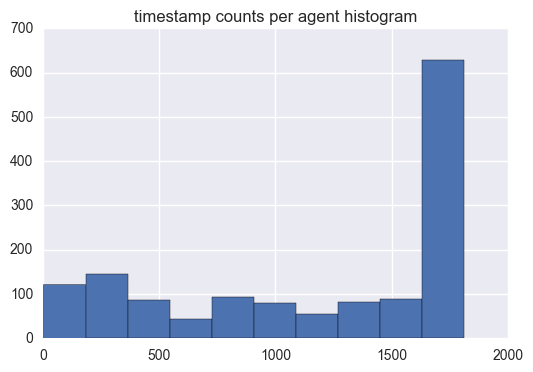

In [66]:
plt.hist(max_row)
plt.title('timestamp counts per agent histogram')

In [67]:
missing = []
for i,j in zip(max_row, min_row):
    missing.append(i-j)

In [68]:
missing

[938,
 728,
 1543,
 116,
 1813,
 1813,
 1543,
 218,
 1340,
 204,
 779,
 218,
 829,
 1646,
 202,
 218,
 932,
 1813,
 1813,
 159,
 932,
 1813,
 218,
 422,
 391,
 1813,
 1394,
 1003,
 1813,
 1813,
 932,
 1442,
 1745,
 1711,
 1395,
 1813,
 1543,
 320,
 285,
 1813,
 1813,
 62,
 253,
 201,
 1442,
 1745,
 1813,
 1273,
 185,
 167,
 1813,
 986,
 1813,
 1813,
 932,
 1813,
 1813,
 1338,
 185,
 369,
 1035,
 377,
 25,
 1813,
 1543,
 1813,
 422,
 996,
 470,
 176,
 52,
 252,
 99,
 1543,
 320,
 49,
 1386,
 1813,
 1527,
 1813,
 872,
 185,
 320,
 185,
 1524,
 218,
 1813,
 683,
 1813,
 141,
 1813,
 1442,
 218,
 320,
 1813,
 1539,
 1813,
 1442,
 728,
 1136,
 1813,
 1813,
 1813,
 167,
 829,
 185,
 357,
 523,
 404,
 99,
 728,
 1003,
 1813,
 14,
 422,
 1813,
 1813,
 1340,
 1341,
 1527,
 320,
 320,
 185,
 1340,
 1813,
 1813,
 1175,
 1813,
 1813,
 1349,
 185,
 1813,
 984,
 1813,
 1136,
 1136,
 136,
 1813,
 1813,
 1813,
 1646,
 1813,
 218,
 204,
 218,
 1813,
 1813,
 765,
 19,
 523,
 1632,
 883,
 1813,
 1745,
 1

In [69]:
min_row

[708,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1541,
 0,
 0,
 0,
 0,
 1240,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1422,
 0,
 419,
 810,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 891,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 755,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1541,
 0,
 0,
 0,
 1048,
 0,
 0,
 181,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 504,
 0,
 0,
 0,
 0,
 1183,
 0,
 0,
 1628,
 826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 729,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 351,
 117,
 0,
 0,
 0,
 0,
 0,
 720,
 0,
 0,
 0,
 0,
 1341,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 283,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 1628,
 16